# Beta538 - Data Science

EDA




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

   column_name                                        description
0    PST045214                          Population, 2014 estimate
1    PST040210          Population, 2010 (April 1) estimates base
2    PST120214  Population, percent change - April 1, 2010 to ...
3    POP010210                                   Population, 2010
4    AGE135214               Persons under 5 years, percent, 2014
5    AGE295214              Persons under 18 years, percent, 2014
6    AGE775214           Persons 65 years and over, percent, 2014
7    SEX255214                      Female persons, percent, 2014
8    RHI125214                         White alone, percent, 2014
9    RHI225214     Black or African American alone, percent, 2014
10   RHI325214  American Indian and Alaska Native alone, perce...
11   RHI425214                         Asian alone, percent, 2014
12   RHI525214  Native Hawaiian and Other Pacific Islander alo...
13   RHI625214                   Two or More Races, percent, 2014
14   RHI72

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128320be0>,
      dtype=object)

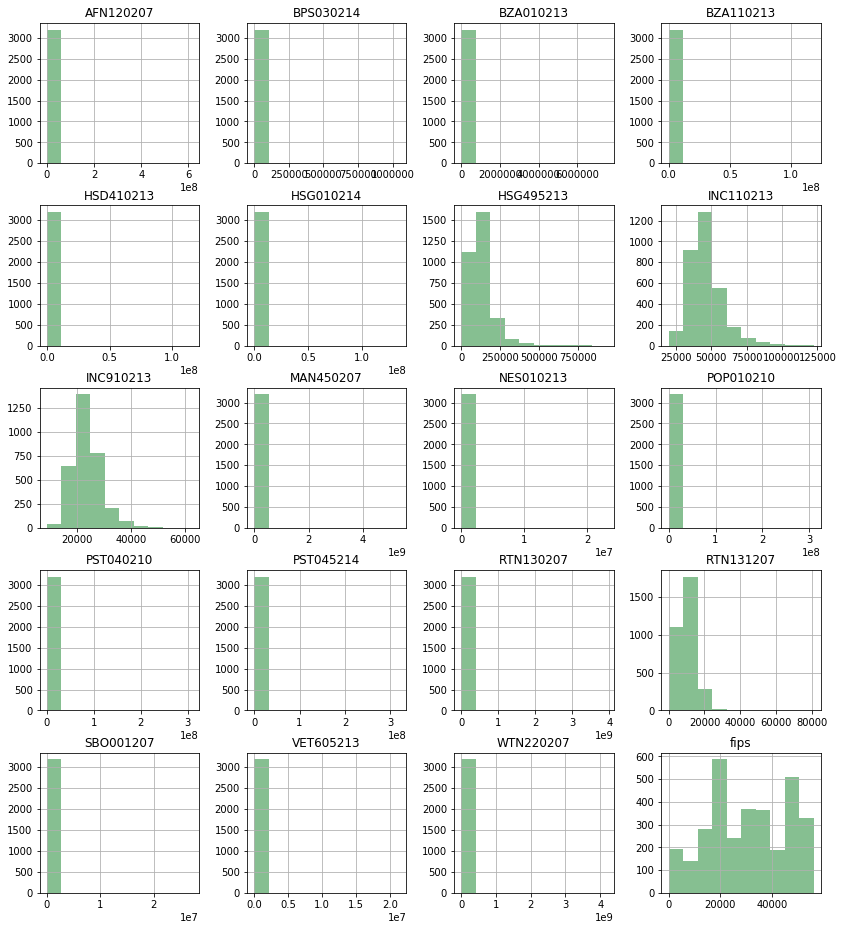

In [146]:
countyfacts = pd.read_csv('../data/_processed/_allcsv/county_facts.csv', delimiter=";")
countyfacts_dictionary = pd.read_csv('../data/_processed/_allcsv/county_facts_dictionary.csv', delimiter=";")

print(countyfacts_dictionary)
countyfacts.head()

countyfacts.hist(figsize=[14, 16], color='#86bf91')

Seems like this dataset is very clean. It got a lot like alot alot attributes to use and all of them are filled. But, we technically only do have like 2 "big" datapoints. Each county got some values for 2010 and 2014. As we want to predict we can only use those attributes that were measured in both years. Sadly thats only very few ones given a dictionary review. 

In [154]:
votes = pd.read_csv('../data/_processed/_allcsv/votes.csv', delimiter=",")

print(votes.columns)

uniqueColumns = list(set(votes.columns) - set(countyfacts_dictionary['column_name'].unique()))

print(len(uniqueColumns))
print(len(votes.columns))
print(len(countyfacts_dictionary['column_name'].unique()))

Index(['id', 'X', 'combined_fips', 'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'Clinton', 'Trump', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name', 'FIPS',
       'total_votes_2012', 'votes_dem_2012', 'votes_gop_2012', 'county_fips',
       'state_fips', 'Obama', 'Romney', 'diff_2012', 'per_point_diff_2012',
       'fips', 'area_name', 'state_abbreviation', 'population2014',
       'population2010', 'population_change', 'POP010210', 'AGE135214',
       'AGE295214', 'age65plus', 'SEX255214', 'White', 'Black', 'RHI325214',
       'RHI425214', 'RHI525214', 'RHI625214', 'Hispanic', 'RHI825214',
       'POP715213', 'POP645213', 'NonEnglish', 'Edu_highschool',
       'Edu_batchelors', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213',
       'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'Income',
       'INC110213', 'Poverty', 'BZA010213', 'BZA110213', 'BZA115213',
       'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207',
       

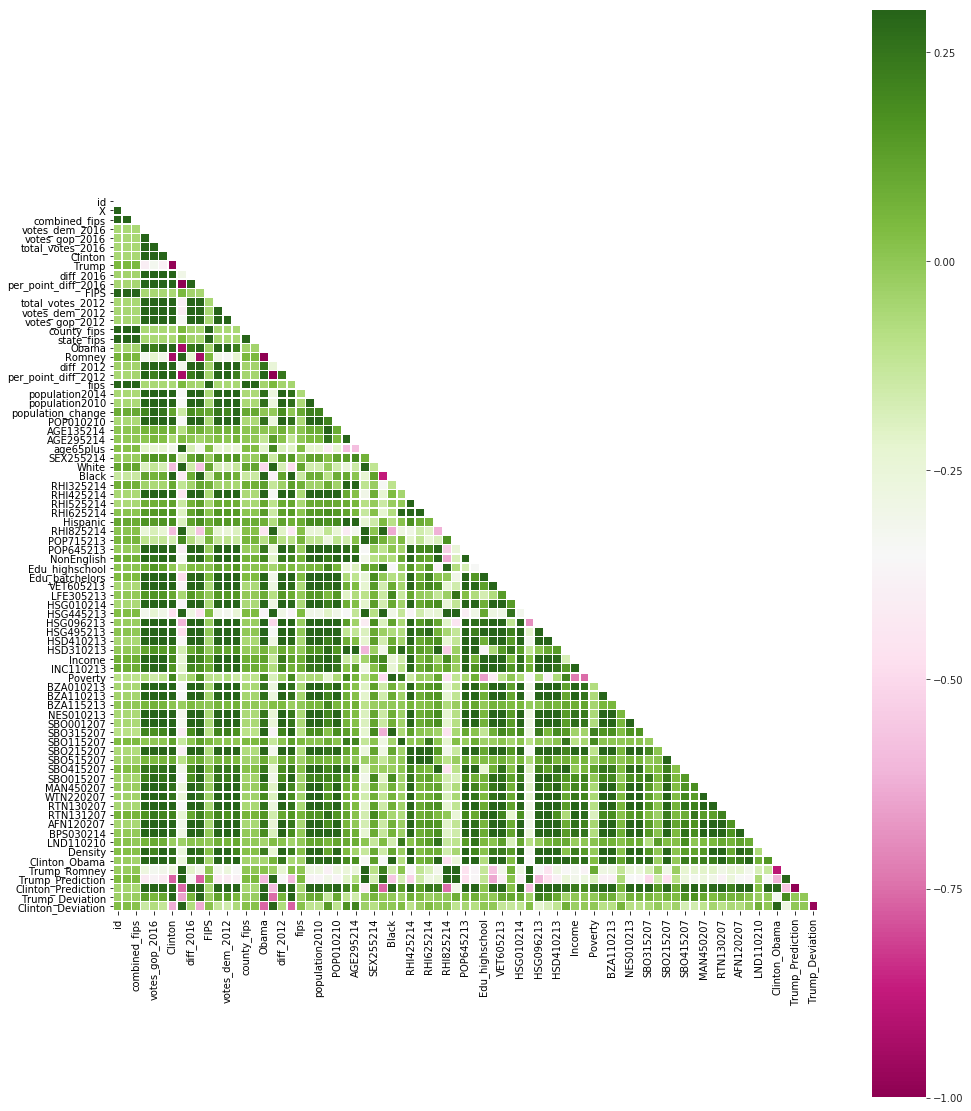

In [5]:
corr = votes.corr() #Calculate the correlation of the above variables

#Plot the correlation as heat map
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 20))

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.4, cmap="PiYG")

Index(['Unnamed: 0', 'combined_fips', 'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'per_dem_2016', 'per_gop_2016', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name', 'FIPS',
       'total_votes_2012', 'votes_dem_2012', 'votes_gop_2012', 'county_fips',
       'state_fips', 'per_dem_2012', 'per_gop_2012', 'diff_2012',
       'per_point_diff_2012'],
      dtype='object')


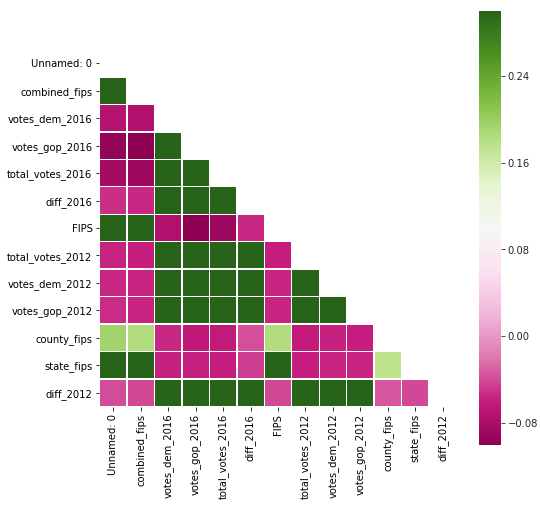

In [151]:
countylevelresults = pd.read_csv('../data/_processed/_allcsv/US_County_Level_Presidential_Results_12-16.csv', delimiter=";")

print(countylevelresults.columns)

#Calculate the correlation
corr = countylevelresults.corr() 

#Plot the correlation as heat map
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.4, cmap="PiYG")

All datasets seems to contain very similar information. The information obtained from the County level results dataset is completly redundant to the "votes" dataset. datasets "votes" and countyfacts do indeed give a more insights together although they match widely.

>approach: creating one dataset that contains a timeseries on the votes per party based on countys and all features that are available in from both years 2010 and 2014. 

### Creating a cleaned dataset from "votes" using 

'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'Clinton', 'Trump', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name',
       'total_votes_2012', 'votes_dem_2012', 'votes_gop_2012', 'Obama', 'Romney', 'diff_2012', 'per_point_diff_2012', 'area_name', 'state_abbreviation', 'population2014',
       'population2010', 
       

In [32]:
cleanedSet = pd.DataFrame(columns=['state_abbr', 'county_name', 'votes_dem', 'votes_gop', 'total_votes', 'candDem',  'candGop', 'diff', 'diff_per_point', 'population', 'elecYear'])

for index, row in votes.iterrows():
    tmp16 = row[['state_abbr', 'county_name', 'votes_dem_2016', 'votes_gop_2016', 'total_votes_2016', 'Clinton', 'Trump', 'diff_2016', 'per_point_diff_2016', 'population2014']]
    tmp16['elecYear'] = '2016'
    tmp16 = pd.DataFrame(tmp16)
    cleanedSet.loc[len(cleanedSet)] = [j for sub in tmp16.values for j in sub]
    
    tmp12 = row[['state_abbr', 'county_name', 'votes_dem_2012', 'votes_gop_2012', 'total_votes_2012', 'Obama', 'Romney', 'diff_2012', 'per_point_diff_2012', 'population2010']]
    tmp12['elecYear'] = '2012'
    tmp12 = pd.DataFrame(tmp12)
    cleanedSet.loc[len(cleanedSet)] = [j for sub in tmp12.values for j in sub]
    
cleanedSet

Empty DataFrame
Columns: [state_abbr, county_name, votes_dem, votes_gop, total_votes, candDem, candGop, diff, diff_per_point, population, elecYear]
Index: []
     state_abbr         county_name votes_dem votes_gop total_votes   candDem  \
0            AL      Autauga County      5908     18110       24661  0.239569   
1            AL      Autauga County      6354     17366       23909  0.265758   
2            AL      Baldwin County     18409     72780       94090  0.195653   
3            AL      Baldwin County     18329     65772       84988  0.215666   
4            AL      Barbour County      4848      5431       10390  0.466603   
5            AL      Barbour County      5873      5539       11459  0.512523   
6            AL         Bibb County      1874      6733        8748  0.214220   
7            AL         Bibb County      2200      6131        8391  0.262186   
8            AL       Blount County      2150     22808       25384  0.084699   
9            AL       Blount Cou

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1258cf7f0>,
      dtype=object)

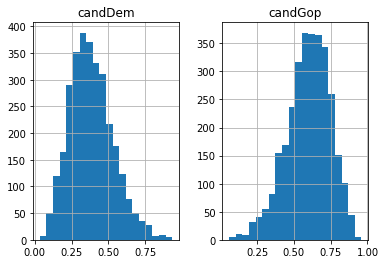

In [77]:
cleanedSet.loc[(cleanedSet["elecYear"] == '2012')][['candDem', 'candGop']].hist(bins=20)

(0, 500000)

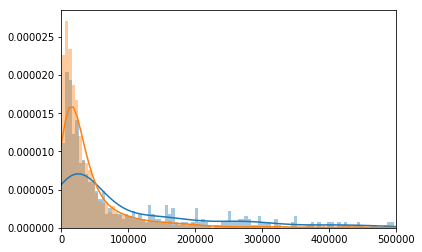

In [148]:
#Population of Countys Democrats won vs Population of Countys Republicans won
#2012 election

sns.distplot([j for sub in cleanedSet[(cleanedSet.candDem > 0.5) & (cleanedSet.population < 500000) & (cleanedSet.elecYear == "2012")][['population']].reset_index(drop=True).values for j in sub], bins=100);
#print("Population of the most inhabitated county democrats won")
#print(cleanedSet[(cleanedSet.candDem > 0.5) & (cleanedSet.population < 500000)][['population']].reset_index(drop=True).values.max())
plt.xlim(0, 500000)

sns.distplot([j for sub in cleanedSet[(cleanedSet.candGop > 0.5) & (cleanedSet.population < 500000) & (cleanedSet.elecYear == "2012")][['population']].reset_index(drop=True).values for j in sub], bins=100);
#print("vs republicans")
#print(cleanedSet[(cleanedSet.candGop > 0.5) & (cleanedSet.population < 500000)][['population']].reset_index(drop=True).values.max())
plt.xlim(0, 500000)


(0, 500000)

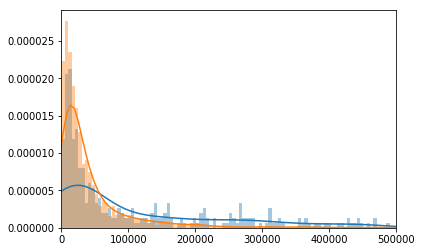

In [149]:
#Population of Countys Democrats won vs Population of Countys Republicans won
#2016
sns.distplot([j for sub in cleanedSet[(cleanedSet.candDem > 0.5) & (cleanedSet.population < 500000) & (cleanedSet.elecYear == "2016")][['population']].reset_index(drop=True).values for j in sub], bins=100);
#print("Population of the most inhabitated county democrats won")
#print(cleanedSet[(cleanedSet.candDem > 0.5) & (cleanedSet.population < 500000)][['population']].reset_index(drop=True).values.max())
plt.xlim(0, 500000)

sns.distplot([j for sub in cleanedSet[(cleanedSet.candGop > 0.5) & (cleanedSet.population < 500000) & (cleanedSet.elecYear == "2016")][['population']].reset_index(drop=True).values for j in sub], bins=100);
#print("vs republicans")
#print(cleanedSet[(cleanedSet.candGop > 0.5) & (cleanedSet.population < 500000)][['population']].reset_index(drop=True).values.max())
plt.xlim(0, 500000)


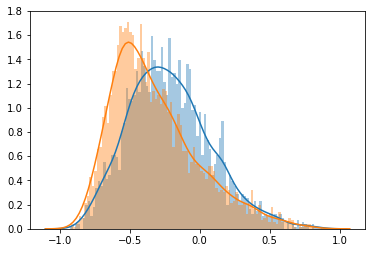

In [144]:
sns.distplot(cleanedSet[(cleanedSet.elecYear == "2012")][['diff_per_point']], bins=100)#.hist(bins=20)

sns.distplot(cleanedSet[(cleanedSet.elecYear == "2016")][['diff_per_point']], bins=100)#.hist(bins=20)

As we see republicans tend to win countys with less population more often. Also we see that republicans wins are way clearer than those achieved by democrats also we could see that this trend got really strong in the 2016 election.